In [19]:
'''Stores
Anonymized information about the 45 stores, indicating the type and size of store

Features
Contains additional data related to the store, department, and regional activity for the given dates.

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week'''

'Stores\nAnonymized information about the 45 stores, indicating the type and size of store\n\nFeatures\nContains additional data related to the store, department, and regional activity for the given dates.\n\nStore - the store number\nDate - the week\nTemperature - average temperature in the region\nFuel_Price - cost of fuel in the region\nMarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA\nCPI - the consumer price index\nUnemployment - the unemployment rate\nIsHoliday - whether the week is a special holiday week\nSales\nHistorical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:\n\nStore - the store number\nDept - the department number\nDate - the week\nWeekly_Sales -  sales for the given department in the given store\nIsHoliday - whether the week is a special holiday week'

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [21]:
features=pd.read_csv('C:/Users/elija/OneDrive - University of Strathclyde/DAIP Project 3/WalmartData/features.csv')
sales=pd.read_csv('C:/Users/elija/OneDrive - University of Strathclyde/DAIP Project 3/WalmartData/sales.csv')
stores=pd.read_csv('C:/Users/elija/OneDrive - University of Strathclyde/DAIP Project 3/WalmartData/stores.csv')

In [22]:
# Convert columns to datetime

features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y')
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')

In [23]:
# Merge tables together

df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores, on=['Store'], how='left')

# Replace N/A with 0 and convert temperature to Celsius

df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.

# Set types to be a factor rather than a string

#types_encoded, types =df['Type'].factorize()
#df['Type'] = types_encoded

df.head()

# Don't rerun as will change temperatures incorrectly

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


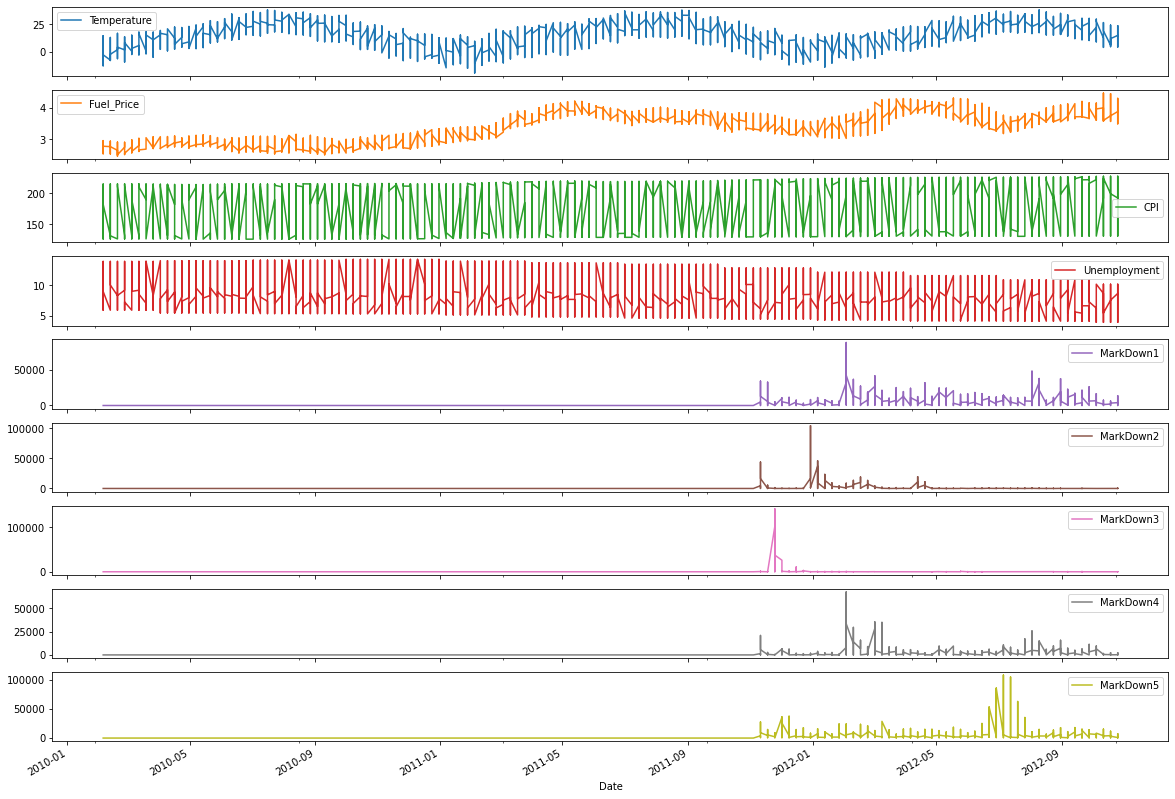

In [24]:
# Plot all the variables against Date to observe any trends

df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

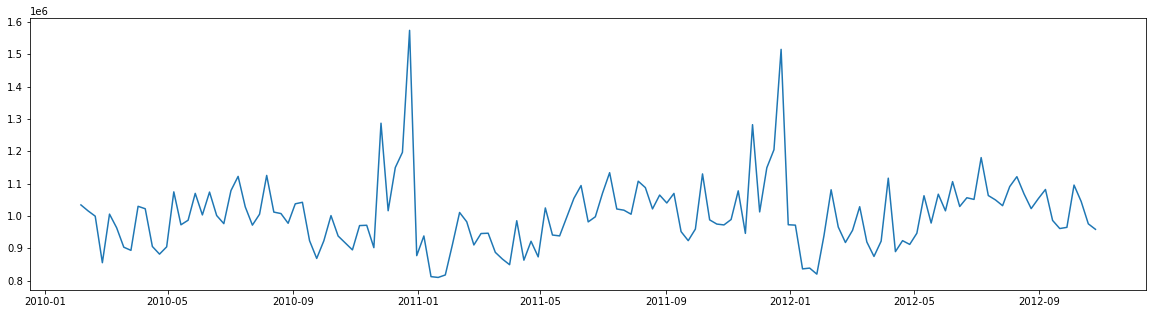

,Date,Weekly_Sales
127,2012-07-13,1063149.78
128,2012-07-20,1049625.90
129,2012-07-27,1031745.14
130,2012-08-03,1090915.09
131,2012-08-10,1121476.51
132,2012-08-17,1068292.56
133,2012-08-24,1022704.20
134,2012-08-31,1053495.51
135,2012-09-07,1081874.03
136,2012-09-14,986131.94


In [70]:
# Sum the weekely sales from every shop to get the total weekly sales volume of the retail chain
df = df.loc[df['Store'] == 26]
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

In [27]:
# Sort sales from highest to lowest
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

# Best weeks for sales

df_average_sales.head()

,Date,Weekly_Sales
46,2010-12-24,1573982.47
98,2011-12-23,1515175.01
42,2010-11-26,1286833.62
94,2011-11-25,1282320.05
97,2011-12-16,1204807.83


In [28]:
# Worst weeks for sales

df_average_sales.tail()

,Date,Weekly_Sales
101,2012-01-13,836305.65
103,2012-01-27,820059.89
51,2011-01-28,817485.14
49,2011-01-14,812323.29
50,2011-01-21,809833.21


In [29]:
# Create time series of sales
df_average_sales = df_average_sales_week.sort_values('Date', ascending=True)

ts = df_average_sales_week.set_index('Date')

ts.index = pd.date_range(start='2010-02-05', end='2012-10-26', freq='7D')

#ts.index = pd.DatetimeIndex(ts.index).to_period('7D')

In [30]:
# Top performing type of stores in term of sales

df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,A,1.434164e+08


In [31]:
# Top performing stores in term of sales

df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False).head()

,Store,Weekly_Sales
0,26,1.434164e+08


In [32]:
# Create table of Date and numerical variables

levels = df[['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','Size']]
levels.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size
246901,2010-02-05,22926.65,-12.472222,2.788,131.527903,8.488,0.0,0.0,0.0,0.0,0.0,152513
246902,2010-02-12,30333.08,-7.700000,2.771,131.586613,8.488,0.0,0.0,0.0,0.0,0.0,152513
246903,2010-02-19,27534.54,-5.211111,2.747,131.637000,8.488,0.0,0.0,0.0,0.0,0.0,152513
246904,2010-02-26,19051.04,-2.600000,2.753,131.686000,8.488,0.0,0.0,0.0,0.0,0.0,152513
246905,2010-03-05,21547.63,-1.888889,2.766,131.735000,8.488,0.0,0.0,0.0,0.0,0.0,152513


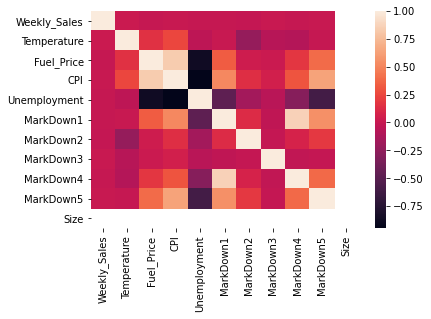

In [33]:
# Compute different correlations

Correlation = levels.corr()
#plt.scatter(levels['Weekly_Sales'],levels['Unemployment'])
# Heatmap of numerical variables
small_df = df[['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','Size']]

corr = small_df.corr()
sns.heatmap(corr)
plt.savefig("Sales Heatmap.png")
plt.show()


In [34]:
# Compute correlation of levels
correlation1 = levels['Weekly_Sales'].corr(levels['MarkDown5'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.set_index('Date')
changes = changes.pct_change()
correlation2 = changes['Weekly_Sales'].corr(changes['MarkDown5'])
print("Correlation of changes: ", correlation2)

df_average_sales_week.index = pd.to_datetime(df_average_sales_week.Date)

levels.corr()

Correlation of levels:  0.0037606496534333673
Correlation of changes:  nan


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size
Weekly_Sales,1.000000,0.018741,-0.001557,0.005636,-0.000775,-0.000137,-0.008243,0.014688,-0.001897,0.003761,NaN
Temperature,0.018741,1.000000,0.160462,0.248141,-0.035540,0.005749,-0.222649,-0.067966,-0.087174,-0.000443,NaN
Fuel_Price,-0.001557,0.160462,1.000000,0.835786,-0.871632,0.333402,0.035322,0.020363,0.183695,0.395367,NaN
CPI,0.005636,0.248141,0.835786,1.000000,-0.948780,0.519008,0.142373,0.057356,0.301518,0.641900,NaN
Unemployment,-0.000775,-0.035540,-0.871632,-0.948780,1.000000,-0.471697,-0.161644,-0.064463,-0.292995,-0.598674,NaN
MarkDown1,-0.000137,0.005749,0.333402,0.519008,-0.471697,1.000000,0.126867,-0.029235,0.866523,0.554726,NaN
MarkDown2,-0.008243,-0.222649,0.035322,0.142373,-0.161644,0.126867,1.000000,-0.012450,0.086277,0.191132,NaN
MarkDown3,0.014688,-0.067966,0.020363,0.057356,-0.064463,-0.029235,-0.012450,1.000000,-0.022505,-0.009429,NaN
MarkDown4,-0.001897,-0.087174,0.183695,0.301518,-0.292995,0.866523,0.086277,-0.022505,1.000000,0.386207,NaN
MarkDown5,0.003761,-0.000443,0.395367,0.641900,-0.598674,0.554726,0.191132,-0.009429,0.386207,1.000000,NaN


The autocorrelation is:  -0.32211208133422087


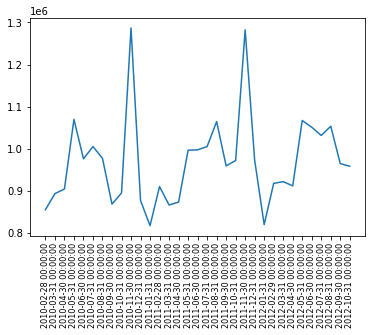

In [35]:
# Autocorrelation of sales data
ts1 = ts.resample(rule='M').last()

ts1['Return'] = ts1['Weekly_Sales'].pct_change()

autocorrelation = ts1['Return'].autocorr()
print("The autocorrelation is: ",autocorrelation)

#plt.plot(ts1.index,ts1['Weekly_Sales'])
x = np.arange(0,len(ts1),1)
fig, ax = plt.subplots(1,1)
ax.plot(x,ts1['Weekly_Sales'])
ax.set_xticks(x)
ax.set_xticklabels(ts1.index)
plt.xticks(rotation=90,fontsize = 8)
plt.show()



[ 1.          0.33850266  0.25085671  0.05115887  0.21238857 -0.09405837
 -0.09996472 -0.03836309 -0.0058908  -0.02231519 -0.10211197 -0.00296087
 -0.13223057 -0.0667503  -0.13480199 -0.01868856 -0.11269594 -0.05065572
 -0.10217004 -0.0700385  -0.07821291 -0.06731791 -0.0051411  -0.03557254
  0.0801636  -0.01414053  0.11229513  0.02762407  0.08513296 -0.00404029
  0.02049864 -0.03663918 -0.05539115 -0.00793722 -0.07948783 -0.02934022
 -0.09612463 -0.00818555 -0.10138257 -0.09093886 -0.09293436]


C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:655: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


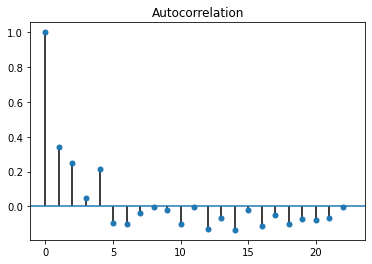

,Weekly_Sales
2012-09-28,964726.37
2012-10-05,1095504.26
2012-10-12,1044639.69
2012-10-19,975578.02
2012-10-26,958619.80


In [36]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

# Compute the acf array of df_average_sales_week
ts = ts[['Weekly_Sales']]
acf_array = acf(ts)
print(acf_array)

# Plot the acf function
plot_acf(ts,alpha=1)
plt.show()


ts.tail()

The autocorrelation of weekly MSFT returns is -0.32
The approximate confidence interval is +/- 0.16


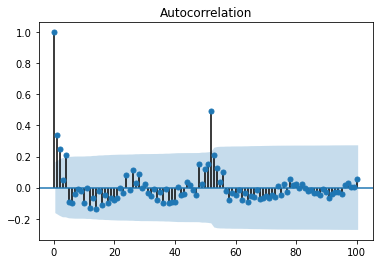

In [37]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(ts)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 100 lags using plot_acf
plot_acf(ts, alpha=0.05, lags=100)
plt.show()

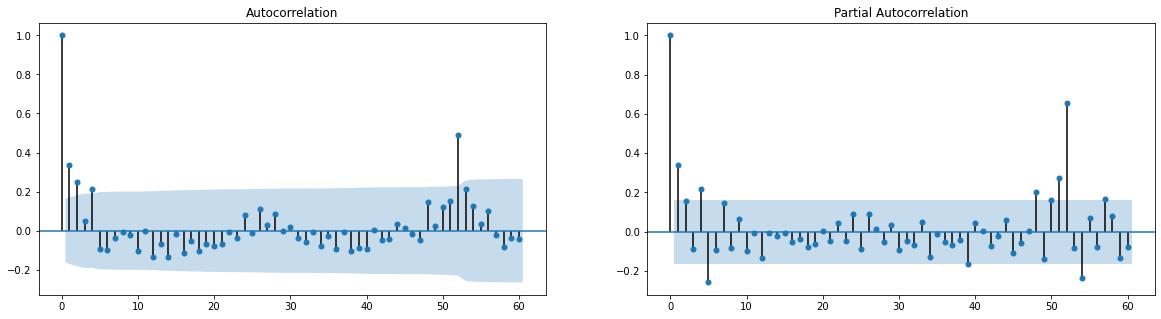

In [38]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=60, ax=axes[0])
plot_pacf(ts, lags=60, ax=axes[1])
plt.show()

# SV at 1, 2, 5, 52

The mean is 0.021 and the standard deviation is 0.054


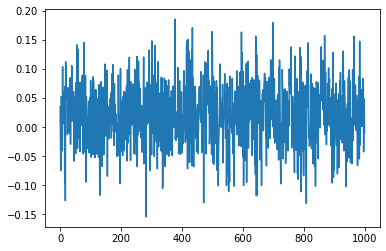

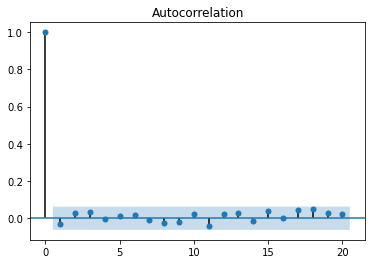

In [39]:
# Comparison to white noise

# Simulate white noise returns
returns = np.random.normal(loc=0.022, scale=0.051, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

In [40]:
# Is the series a random walk? (If p-value below 0.05 can reject random walk hypothesis)
from statsmodels.tsa.stattools import adfuller

results = adfuller(ts['Weekly_Sales'])

print("The p-values is: " + str(results[1]))
print("\n")
print(results)

#The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

The p-values is: 3.4916389051399674e-05


(-4.899731264479446, 3.4916389051399674e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3320.496989223648)


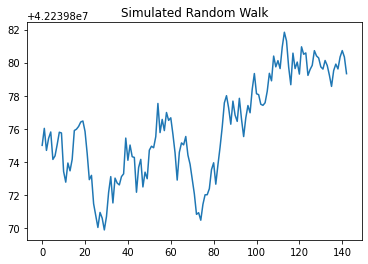

In [41]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=143)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate sales amount, S with a starting sales volume of 42239875
S = 42239875 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(S, label="first random walk")
plt.title("Simulated Random Walk")
plt.show()

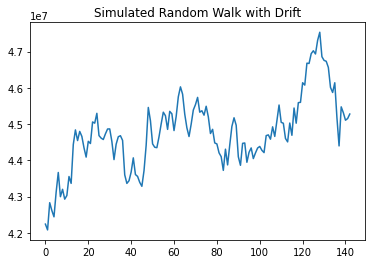

In [42]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=143) + 1

# Set first element to 1
steps[0]=1

# Simulate sales amount, S with a starting sales volume of 42239875, by taking the cumulative product
S = 42239875 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(S)
plt.title("Simulated Random Walk with Drift")
plt.show()

            Weekly_Sales
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12     -70737.12
2010-03-19    -112317.54
2010-03-26    -105735.55
2010-04-02     174464.19
2010-04-09      16624.23


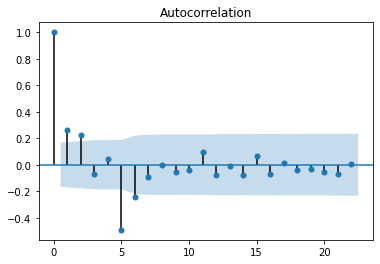

In [43]:
# 1, 5, 6, 52

tssa = ts.diff(5)

# Print the first 10 rows of the seasonally adjusted series
print(tssa.head(10))

# Drop the NaN data in the first four rows
tssa = tssa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(tssa)
plt.show()

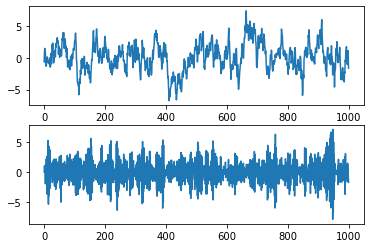

In [44]:
# import the module for simulating data (ARMA)

from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, +0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

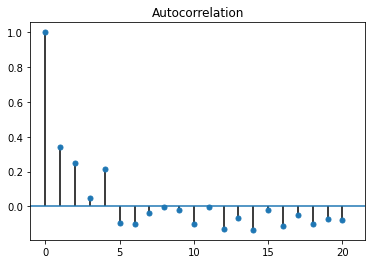

In [45]:
# Work out AR parameter for series (~0.2?)

# Plot 1: AR parameter = +0.2
plot_acf(ts, alpha=1, lags=20)
plt.show()

In [46]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(ts, order=(5,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.2, the estimate of phi (and the constant) are:")
print(res.params)

C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(5, 0)   Log Likelihood               -1844.430
Method:                       css-mle   S.D. of innovations          96452.795
Date:                Thu, 03 Dec 2020   AIC                           3702.860
Time:                        13:17:08   BIC                           3723.600
Sample:                    02-05-2010   HQIC                          3711.288
                         - 10-26-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.003e+06   1.34e+04     74.667      0.000    9.77e+05    1.03e+06
ar.L1.Weekly_Sales     0.3670      0.080      4.559      0.000       0.209       0.525
ar.L2.Weekly_Sales  

C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


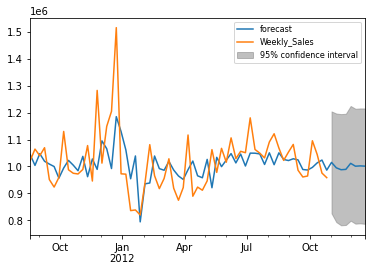

In [47]:
# SV at 2, 6, 30, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 58, 60, 61, 62, 63, 64, 65, 66, 67, 99, 100

from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(5) model
mod = ARMA(ts, order=(5,0))
res = mod.fit()
res.plot_predict(start=80, end=150)
plt.legend(fontsize=8)
plt.show()

C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

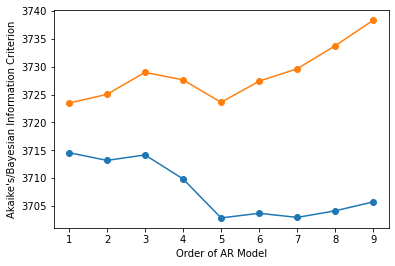

C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

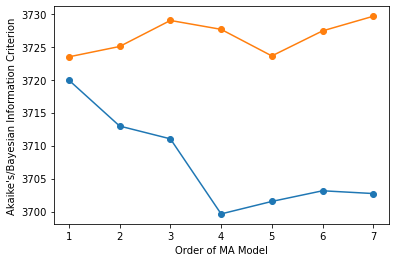

In [48]:
# Lowest AIC gives correct AR order
# Lowest BIC gives correct AR order

# Fit the data to an AR(p) for p = 0,...,10 , and save the AIC
AIC = np.zeros(10)
for p in range(10):
    mod = ARMA(ts, order=(p,0))
    res = mod.fit()
# Save AIC for AR(p)    
    AIC[p] = res.aic

# Plot the AIC as a function of p
plt.plot(range(1,10), AIC[1:10], marker='o')

BIC = np.zeros(10)
for p in range(10):
    mod = ARMA(ts, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,10), BIC[1:10], marker='o')

plt.xlabel('Order of AR Model')
plt.ylabel("Akaike's/Bayesian Information Criterion")
plt.show()

# Fit the data to an MA(q) for q = 0,...,8 , and save the AIC
AIC = np.zeros(8)
for q in range(8):
    mod = ARMA(ts, order=(0,q))
    res = mod.fit()
# Save AIC for AR(p)    
    AIC[q] = res.aic
    
# Plot the AIC as a function of p
plt.plot(range(1,8), AIC[1:8], marker='o')

BIC = np.zeros(10)
for p in range(10):
    mod = ARMA(ts, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,8), BIC[1:8], marker='o')

plt.xlabel('Order of MA Model')
plt.ylabel("Akaike's/Bayesian Information Criterion")
plt.show()

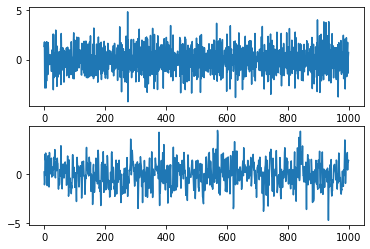

In [49]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

In [50]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to ts
mod = ARMA(ts, order=(0,5))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("The estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(0, 5)   Log Likelihood               -1843.771
Method:                       css-mle   S.D. of innovations          95994.901
Date:                Thu, 03 Dec 2020   AIC                           3701.541
Time:                        13:17:42   BIC                           3722.281
Sample:                    02-05-2010   HQIC                          3709.969
                         - 10-26-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.003e+06   1.57e+04     64.037      0.000    9.72e+05    1.03e+06
ma.L1.Weekly_Sales     0.3628      0.085      4.256      0.000       0.196       0.530
ma.L2.Weekly_Sales  

C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


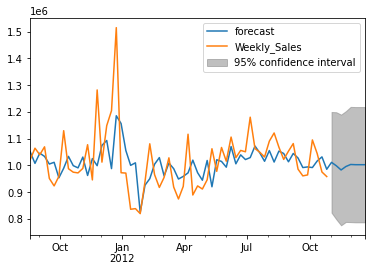

In [53]:
# Forecast the first MA(5) model
mod = ARMA(ts, order=(0,5))
res = mod.fit()
res.plot_predict(start=80, end=150)
plt.show()

C:\Users\elija\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(5, 4)   Log Likelihood               -1842.503
Method:                       css-mle   S.D. of innovations          95100.689
Date:                Thu, 03 Dec 2020   AIC                           3707.006
Time:                        13:19:18   BIC                           3739.597
Sample:                    02-05-2010   HQIC                          3720.249
                         - 10-26-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.003e+06   1.38e+04     72.579      0.000    9.76e+05    1.03e+06
ar.L1.Weekly_Sales     0.1986      0.360      0.552      0.581      -0.507       0.904
ar.L2.Weekly_Sales  

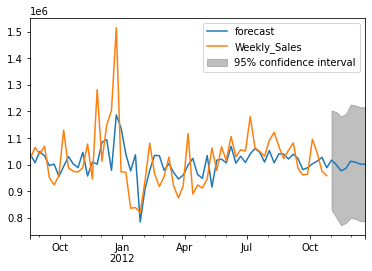

In [58]:
# Best ARMA model seems to be order (5,5) according to AIC and BIC analysis

mod = ARMA(ts, order=(5,4))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("The estimate of theta (and the constant) are:")
print(res.params)

res.plot_predict(start=80, end=150)
plt.show()

In [80]:
#print(res.summary())
res.predict(start=127, end=142)

from sklearn.metrics import mean_squared_error

df_average_sales_week.tail(16)
y_test = (1063149.78,1049625.90,1031745.14,1090915.09,1121476.51,1068292.56,1022704.20,1053495.51,1081874.03,986131.94,
          961084.08,964726.37,1095504.26,1044639.69,975578.02,958619.80)

y_pred = (1.060814e+06,1.045900e+06,1.009921e+06,1.053165e+06,1.006924e+06,1.041054e+06,1.039376e+06,1.021170e+06,
          1.039241e+06,1.022804e+06,9.813303e+05,9.886451e+05,1.003475e+06,1.013224e+06,1.027523e+06,9.883757e+05)

mean_squared_error(y_test, y_pred, squared=False)

# 2012-10-26



2143266243.624988

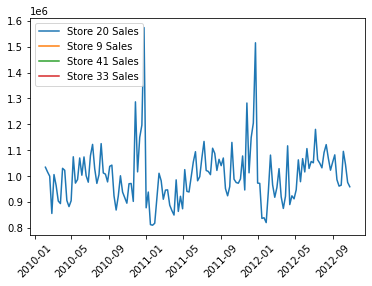

In [76]:
# Does the performance of one store show a similar trend to another store and the overall trend

# Compare the sales against time for 4 random stores

avg_sales_stores = df.groupby(by=(['Store','Date']), as_index=False)['Weekly_Sales'].sum()

dfext1=avg_sales_stores.where( avg_sales_stores['Store'] == 26).dropna()
dfext2=avg_sales_stores.where( avg_sales_stores['Store'] == 9).dropna()
dfext3=avg_sales_stores.where( avg_sales_stores['Store'] == 41).dropna()
dfext4=avg_sales_stores.where( avg_sales_stores['Store'] == 33).dropna()

plt.plot(dfext1['Date'], dfext1['Weekly_Sales'], label='Store 20 Sales')
plt.plot(dfext2['Date'], dfext2['Weekly_Sales'], label='Store 9 Sales')
plt.plot(dfext3['Date'], dfext3['Weekly_Sales'], label='Store 41 Sales')
plt.plot(dfext4['Date'], dfext4['Weekly_Sales'], label='Store 33 Sales')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Verify store performances are cointegrated
dfext1 = dfext1.sort_values('Date', ascending=True)
dfext2 = dfext2.sort_values('Date', ascending=True)
dfext3 = dfext3.sort_values('Date', ascending=True)
dfext4 = dfext4.sort_values('Date', ascending=True)

tsext1 = dfext1.set_index('Date')
tsext2 = dfext2.set_index('Date')
tsext3 = dfext3.set_index('Date')
tsext4 = dfext4.set_index('Date')

tsext1 = tsext1.drop(columns=['Store'])
tsext2 = tsext2.drop(columns=['Store'])
tsext3 = tsext3.drop(columns=['Store'])
tsext4 = tsext4.drop(columns=['Store'])

tsext1.index = pd.date_range(start='2010-02-05', end='2012-10-26', freq='7D')
tsext2.index = pd.date_range(start='2010-02-05', end='2012-10-26', freq='7D')
tsext3.index = pd.date_range(start='2010-02-05', end='2012-10-26', freq='7D')
tsext4.index = pd.date_range(start='2010-02-05', end='2012-10-26', freq='7D')


# Compute the ADF for each store
result_26 = adfuller(tsext1['Weekly_Sales'])
print("The p-value for the ADF test on Store 26 is ", result_26[1])
result_9 = adfuller(tsext2['Weekly_Sales'])
print("The p-value for the ADF test on Store 9 is ", result_9[1])
result_41 = adfuller(tsext3['Weekly_Sales'])
print("The p-value for the ADF test on Store 41 is ", result_41[1])
result_33 = adfuller(tsext4['Weekly_Sales'])
print("The p-value for the ADF test on Store 33 is ", result_33[1])

# Compute the ADF of the spread
result_spread = adfuller(tsext1['Weekly_Sales'] - tsext2['Weekly_Sales'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

# Spread between stores performance is not a random walk

ValueError: Length mismatch: Expected axis has 0 elements, new values have 143 elements

In [ ]:
# Regress BTC on ETH
tsext2 = sm.add_constant(tsext2)
result = sm.OLS(tsext1,tsext2).fit()

# Compute ADF
b = result.params[1]
b
adf_stats = adfuller(tsext1['Weekly_Sales'] - b*tsext2['Weekly_Sales'])
print("The p-value for the ADF test is ", adf_stats[1])

# Spread between stores performance is not a random walk

In [ ]:
# Train-Split
